Working with the whole Titanic dataset instead of just a fraction
- so I can test the capabilities of my machine learning program
-

Key takeaways:
- there is a RandomForestClassifier for discrete outputs (RandomForestRegressor for continuous output)
- 


References:
 - click [here](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv) to download titanic.csv
 - [TowardsDataScience's Program (Random Forest)](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8) to article
 - [hyperparameter tuning](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [1]:
print("Importing libraries, and modules...")
import numpy as np # more efficient maths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print("Reading file from ./titanic.csv ...")
data = pd.read_csv("titanic.csv")
data

Importing libraries, and modules...
Reading file from ./titanic.csv ...


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


#### Preparing Model Instance

In [2]:
print("Initialising Random Forest Classifier instance...")
rf = RandomForestClassifier(n_estimators=100, random_state=1)

Initialising Random Forest Classifier instance...


#### Data Visualisation

Heat Map

Generating correlation heat map...


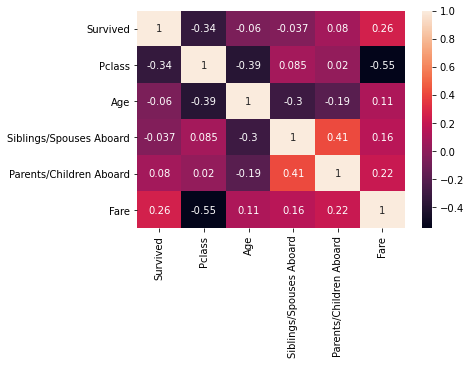

In [3]:
print("Generating correlation heat map...")
sns.heatmap(data.corr(), annot = True);

#### Data Preprocessing

Checking for nulls

In [4]:
print("Checking for nulls...")
data.isnull().sum()

Checking for nulls...


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Extracting Salutations from Name

In [5]:
data['Salutation'] = data['Name'].str.split(' ').str[0]
data.drop("Name", axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Salutation
0,0,3,male,22.0,1,0,7.2500,Mr.
1,1,1,female,38.0,1,0,71.2833,Mrs.
2,1,3,female,26.0,0,0,7.9250,Miss.
3,1,1,female,35.0,1,0,53.1000,Mrs.
4,0,3,male,35.0,0,0,8.0500,Mr.
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,Rev.
883,1,1,female,19.0,0,0,30.0000,Miss.
884,0,3,female,7.0,1,2,23.4500,Miss.
885,1,1,male,26.0,0,0,30.0000,Mr.


Classifying "Salutation" string values with numerical values

In [6]:
data.replace(to_replace={"Mr.": 0, "Mrs.": 1, "Miss.": 2, "Master.": 3, "Don.": 4, "Rev.": 5, "Dr.": 6, "Mme.": 7, "Ms.": 8, "Major.": 9, "Lady.": 10, "Sir.": 11, "Mlle.": 12, "Col.": 13, "Capt.": 14, "the": 15, "Jonkheer.": 16}, inplace=True)
data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Salutation
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,5
883,1,1,female,19.0,0,0,30.0000,2
884,0,3,female,7.0,1,2,23.4500,2
885,1,1,male,26.0,0,0,30.0000,0


Classifying "Sex" strings to integer

In [7]:
print("Replacing values in 'Sex' column...")

data.replace(to_replace={"female": 0, "male": 1}, inplace=True)
data

Replacing values in 'Sex' column...


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Salutation
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000,5
883,1,1,0,19.0,0,0,30.0000,2
884,0,3,0,7.0,1,2,23.4500,2
885,1,1,1,26.0,0,0,30.0000,0


Visualising Feature Importance
- for random forests, the forest will decide on the feature importance on its own, so not required to use feature importance to prevent overfitting

[link](https://machinelearningmastery.com/calculate-feature-importance-with-python/) to referenced page

In [8]:
# print("Visualising feature importance...")

# # creating input and output variables
X = data.drop("Survived", axis=1)
y = data.Survived

# rf.fit(X, y)

# # get importance
# importance = rf.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

Dropping unimportant features so as to prevent overfitting

In [23]:
# print("Dropping 'Pclass', 'Siblings/Spouses Aboard', and 'Parents/Children Aboard' columns...")

# data.drop("Pclass", axis=1, inplace=True)
# data.drop("Siblings/Spouses Aboard", axis=1, inplace=True)
# data.drop("Parents/Children Aboard", axis=1, inplace=True)

Dispaying hyperparameters

In [9]:
print("Getting hyperparameters...")
rf.get_params()

Getting hyperparameters...


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

#### Attempt at Making & Training Model (Random Forest)

In [25]:
print("Splitting data...")
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Scaling data...")
# scaling data
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training model...")
# train model
rf.fit(X_train, y_train)

print("Getting predictions...")
# test
predictions = rf.predict(X_test)

# output test results
df = pd.DataFrame({"actual": y_test, "predicted": predictions})
df.reset_index(drop=True)

Splitting data...
Scaling data...
Training model...
Getting predictions...


,actual,predicted
0,0,0
1,1,1
2,0,1
3,1,1
4,0,0
...,...,...
173,0,0
174,0,0
175,1,1
176,1,1


#### Another Attempt with GridSearchCV Training

In [13]:
print("Splitting data...")
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))
hyperparameters = rf.get_params()


clf = GridSearchCV(pipeline, rf.get_params(), cv=10)
clf.fit(X_train, y_train)

print("Getting predictions...")
# test
predictions = rf.predict(X_test)

# output test results
df = pd.DataFrame({"actual": y_test, "predicted": predictions})
df.reset_index(drop=True)

Splitting data...


ValueError: Parameter grid for parameter (bootstrap) needs to be a list or numpy array, but got (<class 'bool'>). Single values need to be wrapped in a list with one element.

#### Analyzing Results

Accuracy

In [26]:
print("Getting accuracy scores...")
accuracy_score(y_test, predictions)

Getting accuracy scores...


0.7921348314606742

In [27]:
# number of correct predictions
accuracy_score(y_test, predictions, normalize=False)

141

Confusion Matrix

In [28]:
print("Generating confusion matrix...")
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[1, 0]),index=[1, 0], columns=[1, 0])

Generating confusion matrix...


,1,0
1,56,16
0,21,85
